In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import data

In [2]:
auto = pd.read_fwf('auto-mpg.data',header=None)
auto.columns = ['mpg', 'cylinders','displacement','horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']

In [3]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,"""ford mustang gl"""
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,"""vw pickup"""
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,"""dodge rampage"""
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,"""ford ranger"""


In [4]:
auto.loc[auto['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046.0,19.0,71,1,"""ford pinto"""
126,21.0,6,200.0,?,2875.0,17.0,74,1,"""ford maverick"""
330,40.9,4,85.0,?,1835.0,17.3,80,2,"""renault lecar deluxe"""
336,23.6,4,140.0,?,2905.0,14.3,80,1,"""ford mustang cobra"""
354,34.5,4,100.0,?,2320.0,15.8,81,2,"""renault 18i"""
374,23.0,4,151.0,?,3035.0,20.5,82,1,"""amc concord dl"""


replace "?" to NaN, and change datatype

In [5]:
auto.horsepower = auto.horsepower.replace('?', np.nan)
auto.loc[auto['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [6]:
auto.horsepower = pd.to_numeric(auto.horsepower)
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

replace the number to specific areas. 

In [7]:
auto.origin = auto.origin.replace({1: 'USA', 2:'Asia', 3:'Euro'})


In [8]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA,"""ford mustang gl"""
394,44.0,4,97.0,52.0,2130.0,24.6,82,Asia,"""vw pickup"""
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA,"""dodge rampage"""
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA,"""ford ranger"""


show the distribution for cylinders.

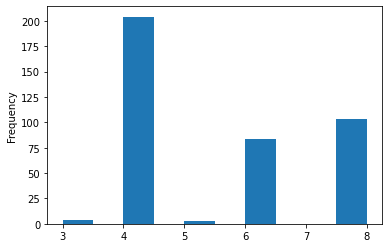

In [9]:
auto['cylinders'].plot.hist()
plt.show()

show relationship between weight and horse power

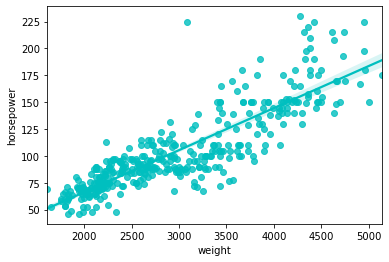

In [10]:
sns.regplot(x='weight',y='horsepower',data=auto,color='c')
plt.show()

show relationship between weight and mpg.

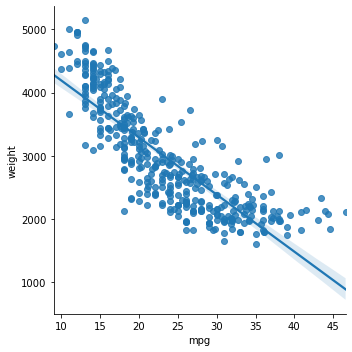

In [11]:
sns.lmplot(x='mpg',y='weight',data=auto)
plt.show()

conclusion: the mpg is proportional to the weight. when mpg is lower, the weight trend to be heavier, and vice versa. But the car has to have a minimun weight to support its operation, so it will not proportional to a very low weight. 